#### Nama: Muhammad Aryasatya N | NPM : 22083010085 | Data Mining (B) | Tugas Sub-CPMK 2

### Import Library

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### Load Dataset

In [2]:
data = pd.read_csv("Perumahan Kota Melbourne.csv")
data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,2.5,2,1,1.0,202,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2.5,2,1,0.0,156,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,2.5,3,2,0.0,134,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,2.5,3,2,1.0,94,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,2.5,3,1,2.0,120,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000,S,Barry,16.7,4,2,2.0,652,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392
13576,Williamstown,77 Merrett Dr,3,h,1031000,SP,Williams,6.8,3,2,2.0,333,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380
13577,Williamstown,83 Power St,3,h,1170000,S,Raine,6.8,3,2,4.0,436,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380
13578,Williamstown,96 Verdon St,4,h,2500000,PI,Sweeney,6.8,4,1,5.0,866,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380


### Tahap Pre-Processing

Handling Missing Values pada kolom 'BuildingArea' dengan menggunakan imputasi Median

In [3]:
median_BuildingArea = data['BuildingArea'].median()
data['BuildingArea'].fillna(median_BuildingArea, inplace=True)

data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,2.5,2,1,1.0,202,126.0,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2.5,2,1,0.0,156,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,2.5,3,2,0.0,134,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,2.5,3,2,1.0,94,126.0,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,2.5,3,1,2.0,120,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000,S,Barry,16.7,4,2,2.0,652,126.0,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392
13576,Williamstown,77 Merrett Dr,3,h,1031000,SP,Williams,6.8,3,2,2.0,333,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380
13577,Williamstown,83 Power St,3,h,1170000,S,Raine,6.8,3,2,4.0,436,126.0,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380
13578,Williamstown,96 Verdon St,4,h,2500000,PI,Sweeney,6.8,4,1,5.0,866,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380


Handling Missing Values pada kolom 'YearBuilt' dengan menggunakan imputasi Median

In [4]:
median_YearBuilt = data['YearBuilt'].median()
data['YearBuilt'].fillna(median_YearBuilt, inplace=True)

data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,2.5,2,1,1.0,202,126.0,1970.0,Yarra,-37.79960,144.99840,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2.5,2,1,0.0,156,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,2.5,3,2,0.0,134,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,2.5,3,2,1.0,94,126.0,1970.0,Yarra,-37.79690,144.99690,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,2.5,3,1,2.0,120,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000,S,Barry,16.7,4,2,2.0,652,126.0,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392
13576,Williamstown,77 Merrett Dr,3,h,1031000,SP,Williams,6.8,3,2,2.0,333,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380
13577,Williamstown,83 Power St,3,h,1170000,S,Raine,6.8,3,2,4.0,436,126.0,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380
13578,Williamstown,96 Verdon St,4,h,2500000,PI,Sweeney,6.8,4,1,5.0,866,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380


Handling Missing Values pada kolom 'CouncilArea' dengan menggunakan imputasi model random forest untuk memprediksi missing value dari fitur target kategorikal (CouncilArea) berdasarkan fitur-fitur lain yang tersedia dalam dataset.

In [5]:
# Pemilihan kolom atau fitur yang akan digunakan untuk perhitungan
selected_features = ["Suburb", "Distance", "Regionname"]

# Pemisahan data menjadi dua bagian, satu "CouncilArea" yang tidak memiliki "Nan" dan memiliki "Nan"
data_train = data.dropna(subset=["CouncilArea"]).copy()  # Data training
data_predict = data[data["CouncilArea"].isnull()].copy()  # Data testing

# Pemisahan kolom atau fitur dan target untuk data yang lengkap
X_train = data_train[selected_features]
y_train = data_train["CouncilArea"]

# Penggunaan ColumnTransformer untuk mengubah data kategorikal menjadi numerik
categorical_features = ["Suburb", "Regionname"]
categorical_transformer = Pipeline(steps=[("onehot", OneHotEncoder(handle_unknown="ignore"))])
preprocessor = ColumnTransformer(transformers=[("cat", categorical_transformer, categorical_features)])

# Pembuatan pipeline untuk preprocessing dan model
clf = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", RandomForestClassifier())])

# Pelatihan pembentukan model
clf.fit(X_train, y_train)

# Prediksi untuk data yang memiliki nilai "NaN" pada kolom "CouncilArea"
X_predict = data_predict[selected_features]
predicted_council_area = clf.predict(X_predict)

# Penyimpanan hasil prediksi 
data_predict.loc[:, "CouncilArea"] = predicted_council_area 
data = pd.concat([data_train, data_predict], axis=0)
data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,2.5,2,1,1.0,202,126.0,1970.0,Yarra,-37.79960,144.99840,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2.5,2,1,0.0,156,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,2.5,3,2,0.0,134,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,2.5,3,2,1.0,94,126.0,1970.0,Yarra,-37.79690,144.99690,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,2.5,3,1,2.0,120,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000,S,Barry,16.7,4,2,2.0,652,126.0,1981.0,Monash,-37.90562,145.16761,South-Eastern Metropolitan,7392
13576,Williamstown,77 Merrett Dr,3,h,1031000,SP,Williams,6.8,3,2,2.0,333,133.0,1995.0,Hobsons Bay,-37.85927,144.87904,Western Metropolitan,6380
13577,Williamstown,83 Power St,3,h,1170000,S,Raine,6.8,3,2,4.0,436,126.0,1997.0,Hobsons Bay,-37.85274,144.88738,Western Metropolitan,6380
13578,Williamstown,96 Verdon St,4,h,2500000,PI,Sweeney,6.8,4,1,5.0,866,157.0,1920.0,Hobsons Bay,-37.85908,144.89299,Western Metropolitan,6380


### Deteksi dan Tangani Outlier

In [6]:
#mengganti outlier dikolom numerik menggunakan lower upper
numeric_cols = data.select_dtypes(include=['float64', 'int64'])

#define function untuk menangani outlier 
def outliers_handling(column):
    
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    low_bound = Q1 - 1.5 * IQR
    up_bound = Q3 + 1.5 * IQR
    column = column.mask(column < low_bound, low_bound)
    column = column.mask(column > up_bound, up_bound)
    return column

#pemrosesan setiap kolom numerik
for col in numeric_cols.columns:
    numeric_cols[col] = outliers_handling(numeric_cols[col])
data[numeric_cols.columns] = numeric_cols

data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2.0,h,1480000,S,Biggin,2.5,2.0,1.0,1.0,202,126.00,1970.0,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2.0,h,1035000,S,Biggin,2.5,2.0,1.0,0.0,156,110.09,1937.5,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3.0,h,1465000,SP,Biggin,2.5,3.0,2.0,0.0,134,141.85,1937.5,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3.0,h,850000,PI,Biggin,2.5,3.0,2.0,1.0,94,126.00,1970.0,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4.0,h,1600000,VB,Nelson,2.5,3.0,1.0,2.0,120,141.85,1997.5,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4.0,h,1245000,S,Barry,16.7,4.0,2.0,2.0,652,126.00,1981.0,Monash,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3.0,h,1031000,SP,Williams,6.8,3.0,2.0,2.0,333,133.00,1995.0,Hobsons Bay,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3.0,h,1170000,S,Raine,6.8,3.0,2.0,3.5,436,126.00,1997.0,Hobsons Bay,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4.0,h,2350000,PI,Sweeney,6.8,4.0,1.0,3.5,866,141.85,1937.5,Hobsons Bay,-37.85908,144.89299,Western Metropolitan,6380.0


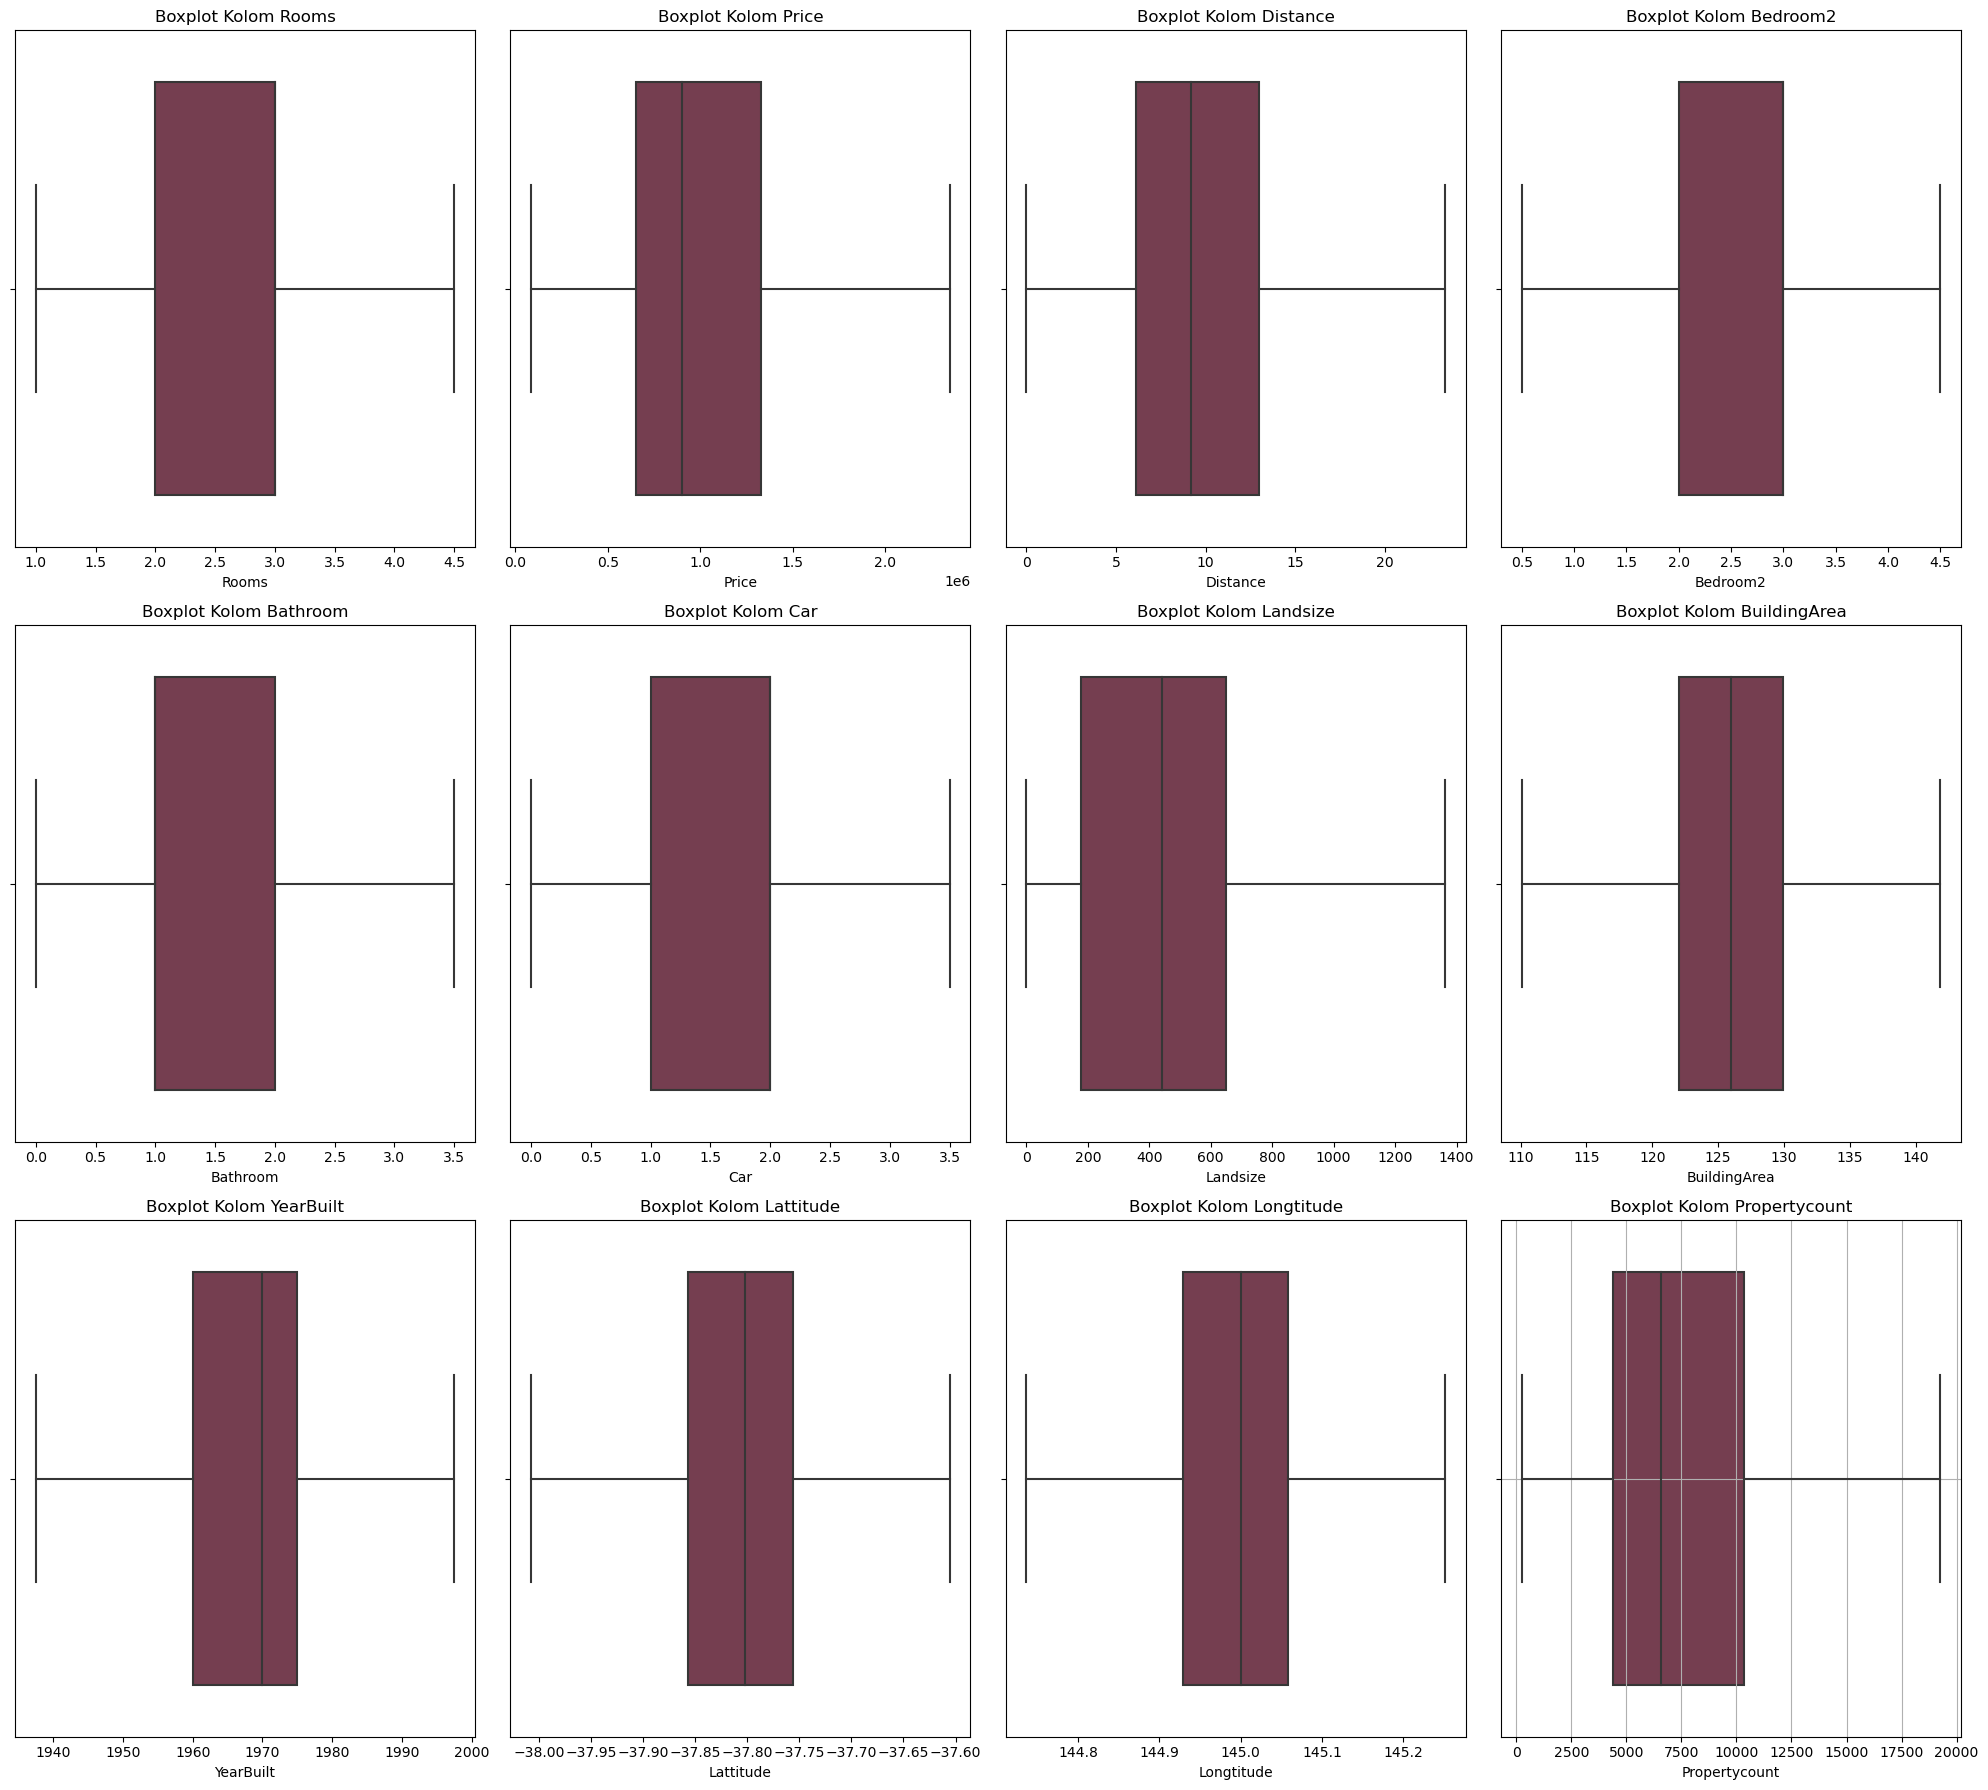

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

color = '#7E354D'  
num_cols = numeric_cols.columns
num_plots = len(num_cols)
num_subplots = 4  
num_rows = -(-num_plots // num_subplots) 

fig, axes = plt.subplots(num_rows, num_subplots, figsize=(20, 6*num_rows))

for i, col in enumerate(num_cols):
    ax = axes[i // num_subplots, i % num_subplots] if num_rows > 1 else axes[i % num_subplots]
    sns.boxplot(x=numeric_cols[col], ax=ax, color=color)
    ax.set_title(f'Boxplot Kolom {col}')

plt.tight_layout() 
plt.grid(True)
plt.show()

### Transformasi Data (Data Normalization)

In [9]:
#normalisasi dengan menggunakan min max scaling
from sklearn.preprocessing import MinMaxScaler

#hanya untuk kolom numerik
numeric_columns = data.select_dtypes(include=['int', 'float']).columns

#normalisasi menggunakan min-max scaling hanya pada kolom-kolom numerik
scaler = MinMaxScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,0.285714,h,0.615894,S,Biggin,0.107066,0.375,0.285714,0.285714,0.148311,0.500945,0.541667,Yarra,0.517454,0.508639,Northern Metropolitan,0.198332
1,Abbotsford,25 Bloomburg St,0.285714,h,0.419426,S,Biggin,0.107066,0.375,0.285714,0.000000,0.114537,0.000000,0.000000,Yarra,0.496792,0.498927,Northern Metropolitan,0.198332
2,Abbotsford,5 Charles St,0.571429,h,0.609272,SP,Biggin,0.107066,0.625,0.571429,0.000000,0.098385,1.000000,0.000000,Yarra,0.493306,0.500869,Northern Metropolitan,0.198332
3,Abbotsford,40 Federation La,0.571429,h,0.337748,PI,Biggin,0.107066,0.625,0.571429,0.285714,0.069016,0.500945,0.541667,Yarra,0.524176,0.505725,Northern Metropolitan,0.198332
4,Abbotsford,55a Park St,0.857143,h,0.668874,VB,Nelson,0.107066,0.625,0.285714,0.571429,0.088106,1.000000,1.000000,Yarra,0.498534,0.500287,Northern Metropolitan,0.198332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,0.857143,h,0.512141,S,Barry,0.715203,0.875,0.571429,0.571429,0.478708,0.500945,0.725000,Monash,0.253520,0.837317,South-Eastern Metropolitan,0.375779
13576,Williamstown,77 Merrett Dr,0.571429,h,0.417660,SP,Williams,0.291221,0.625,0.571429,0.571429,0.244493,0.721348,0.958333,Hobsons Bay,0.368907,0.276791,Western Metropolitan,0.322540
13577,Williamstown,83 Power St,0.571429,h,0.479029,S,Raine,0.291221,0.625,0.571429,1.000000,0.320117,0.500945,0.991667,Hobsons Bay,0.385163,0.292991,Western Metropolitan,0.322540
13578,Williamstown,96 Verdon St,0.857143,h,1.000000,PI,Sweeney,0.291221,0.875,0.285714,1.000000,0.635830,1.000000,0.000000,Hobsons Bay,0.369380,0.303888,Western Metropolitan,0.322540


### Label Encoding

In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

#inisialisasi kolom
columns_to_encode = ["Suburb", "Type", "Method", "SellerG", "CouncilArea", "Regionname"]

#label encoding 
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])
data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,85 Turner St,0.285714,0,0.615894,1,23,0.107066,0.375,0.285714,0.285714,0.148311,0.500945,0.541667,31,0.517454,0.508639,2,0.198332
1,0,25 Bloomburg St,0.285714,0,0.419426,1,23,0.107066,0.375,0.285714,0.000000,0.114537,0.000000,0.000000,31,0.496792,0.498927,2,0.198332
2,0,5 Charles St,0.571429,0,0.609272,3,23,0.107066,0.625,0.571429,0.000000,0.098385,1.000000,0.000000,31,0.493306,0.500869,2,0.198332
3,0,40 Federation La,0.571429,0,0.337748,0,23,0.107066,0.625,0.571429,0.285714,0.069016,0.500945,0.541667,31,0.524176,0.505725,2,0.198332
4,0,55a Park St,0.857143,0,0.668874,4,155,0.107066,0.625,0.285714,0.571429,0.088106,1.000000,1.000000,31,0.498534,0.500287,2,0.198332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,302,12 Strada Cr,0.857143,0,0.512141,1,16,0.715203,0.875,0.571429,0.571429,0.478708,0.500945,0.725000,20,0.253520,0.837317,4,0.375779
13576,305,77 Merrett Dr,0.571429,0,0.417660,3,251,0.291221,0.625,0.571429,0.571429,0.244493,0.721348,0.958333,10,0.368907,0.276791,6,0.322540
13577,305,83 Power St,0.571429,0,0.479029,1,194,0.291221,0.625,0.571429,1.000000,0.320117,0.500945,0.991667,10,0.385163,0.292991,6,0.322540
13578,305,96 Verdon St,0.857143,0,1.000000,0,222,0.291221,0.875,0.285714,1.000000,0.635830,1.000000,0.000000,10,0.369380,0.303888,6,0.322540


### Seleksi Fitur 

In [11]:
# Drop kolom 'Address' yang tidak relevan
data.drop(columns=['Address'], inplace=True)
data

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,0.285714,0,0.615894,1,23,0.107066,0.375,0.285714,0.285714,0.148311,0.500945,0.541667,31,0.517454,0.508639,2,0.198332
1,0,0.285714,0,0.419426,1,23,0.107066,0.375,0.285714,0.000000,0.114537,0.000000,0.000000,31,0.496792,0.498927,2,0.198332
2,0,0.571429,0,0.609272,3,23,0.107066,0.625,0.571429,0.000000,0.098385,1.000000,0.000000,31,0.493306,0.500869,2,0.198332
3,0,0.571429,0,0.337748,0,23,0.107066,0.625,0.571429,0.285714,0.069016,0.500945,0.541667,31,0.524176,0.505725,2,0.198332
4,0,0.857143,0,0.668874,4,155,0.107066,0.625,0.285714,0.571429,0.088106,1.000000,1.000000,31,0.498534,0.500287,2,0.198332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,302,0.857143,0,0.512141,1,16,0.715203,0.875,0.571429,0.571429,0.478708,0.500945,0.725000,20,0.253520,0.837317,4,0.375779
13576,305,0.571429,0,0.417660,3,251,0.291221,0.625,0.571429,0.571429,0.244493,0.721348,0.958333,10,0.368907,0.276791,6,0.322540
13577,305,0.571429,0,0.479029,1,194,0.291221,0.625,0.571429,1.000000,0.320117,0.500945,0.991667,10,0.385163,0.292991,6,0.322540
13578,305,0.857143,0,1.000000,0,222,0.291221,0.875,0.285714,1.000000,0.635830,1.000000,0.000000,10,0.369380,0.303888,6,0.322540


In [ ]:
# Simpan DataFrame ke dalam file CSV
data.to_csv('after_preprocessing.csv', index=False)